In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [60]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466171,104956000
1,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600
2,2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394073,87965400
3,2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471420,90481100
4,2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800


In [61]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2022-09-12,2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466171,104956000
2022-09-13,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600
2022-09-14,2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394073,87965400
2022-09-15,2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471420,90481100
2022-09-16,2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800


In [62]:
signals_df = df.loc[:,['Close']]
signals_df

,Close
2022-09-12,163.429993
2022-09-13,153.839996
2022-09-14,155.309998
2022-09-15,152.369995
2022-09-16,150.699997
...,...
2023-09-01,189.460007
2023-09-05,189.699997
2023-09-06,182.910004
2023-09-07,177.559998


Computing the percentage change of the close column 

In [63]:
signals_df['Acutal Returns'] = signals_df['Close'].pct_change()
signals_df
singals_df = signals_df.dropna()
singals_df.head()

,Close,Acutal Returns
2022-09-13,153.839996,-0.058680
2022-09-14,155.309998,0.009555
2022-09-15,152.369995,-0.018930
2022-09-16,150.699997,-0.010960
2022-09-19,154.479996,0.025083


In [64]:
def shortEma(data):
    return data['Close'].ewm(span=5, adjust=False).mean()

def middleEma(data):
    return data['Close'].ewm(span=21, adjust=False).mean()

def longEma(data):
    return data['Close'].ewm(span=63, adjust=False).mean()

In [65]:
signals_df['Short'] = shortEma(signals_df)
signals_df['Middle'] = middleEma(signals_df)
signals_df['Long'] = longEma(signals_df)

In [66]:
signals_df = signals_df.dropna()
signals_df.head()

,Close,Acutal Returns,Short,Middle,Long
2022-09-13,153.839996,-0.058680,160.233327,162.558175,163.130306
2022-09-14,155.309998,0.009555,158.592218,161.899250,162.885921
2022-09-15,152.369995,-0.018930,156.518143,161.032954,162.557298
2022-09-16,150.699997,-0.010960,154.578761,160.093594,162.186758
2022-09-19,154.479996,0.025083,154.545839,159.583267,161.945921


In [68]:
def buy_sell_function(data):
    buy_list, sell_list = [np.nan] * len(data), [np.nan] * len(data)
    flag_long, flag_short = False, False

    for i in range(0, len(data)):
        if (
            data['Short'][i] > data['Middle'][i] and
            data['Middle'][i] > data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_long = True
        elif flag_long and data['Short'][i] < data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_long = False
        if (
            data['Short'][i] < data['Middle'][i] and
            data['Middle'][i] < data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_short = True
        elif flag_short and data['Short'][i] > data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_short = False
    return buy_list, sell_list

signals_df['Buy'],signals_df['Sell'] = buy_sell_function(signals_df)


/tmp/ipykernel_8671/1409804909.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Buy'],signals_df['Sell'] = buy_sell_function(signals_df)


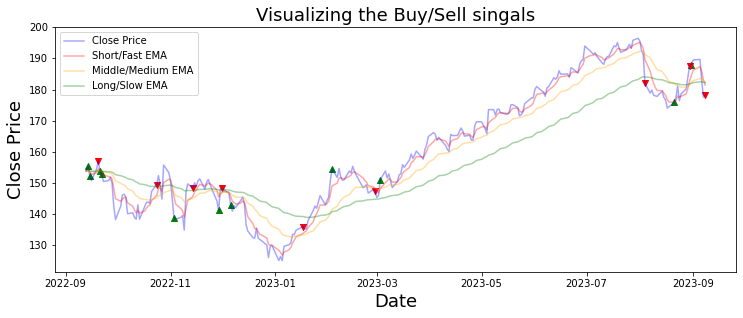

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Visualizing the Buy/Sell singals', fontsize=18)
plt.plot(signals_df['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(signals_df['Short'], label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(signals_df['Middle'], label='Middle/Medium EMA', color='orange', alpha=0.35)
plt.plot(signals_df['Long'], label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(signals_df.index, signals_df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(signals_df.index, signals_df['Sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

In [70]:
signals_df['Signal'] = 0.0 
singals_df

/tmp/ipykernel_8671/326666286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Signal'] = 0.0


,Close,Acutal Returns
2022-09-13,153.839996,-0.058680
2022-09-14,155.309998,0.009555
2022-09-15,152.369995,-0.018930
2022-09-16,150.699997,-0.010960
2022-09-19,154.479996,0.025083
...,...,...
2023-09-01,189.460007,0.008463
2023-09-05,189.699997,0.001267
2023-09-06,182.910004,-0.035793
2023-09-07,177.559998,-0.029249
